# Kmean - Algorithm

<b> Step 1: </b> Random Centriods <br>
<b> Step 2: </b> Label data points <br>
<b> Step 3: </b> Recalculated the new Centroids

Repeat 2)-3) if the new centroid have changed postions <br>
Stop when centroids remain the same

# Preparation

import ไลบรารี่ที่จำเป็น

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Read datasets: created with 3 different Gaussian distributions (3 classes)

Preprocess: Clean data, calculate Log Returns
ล้างข้อมูล (เช่น ลบ NaN, ตรวจชนิดข้อมูล) และคำนวณค่าผลตอบแทนแบบลอการิทึม (Log Return) ซึ่งช่วยลดความแปรปรวนและแสดงการเปลี่ยนแปลงของราคาอย่างแม่นยำ

In [5]:
import pandas as pd
import numpy as np

# โหลดไฟล์ Excel
xls = pd.ExcelFile("/content/tech_stocks_cleaned.xlsx")

# รายชื่อหุ้น (ชื่อ sheet)
tickers = xls.sheet_names

# ดึงข้อมูลของแต่ละหุ้นเก็บไว้
data_dict = {}

for ticker in tickers:
    df = xls.parse(ticker)

    # แปลง Date เป็น datetime และตั้งเป็น index
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  # ป้องกัน error
    df.dropna(subset=["Date"], inplace=True)
    df.set_index("Date", inplace=True)

    # ตรวจสอบชนิดข้อมูล และแปลงเป็นตัวเลขถ้าจำเป็น
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

    # ลบค่า missing
    df.dropna(subset=["Close"], inplace=True)

    # คำนวณผลตอบแทนแบบลอการิทึม (Log Return)
    df["Log_Return"] = np.log(df["Close"] / df["Close"].shift(1))

    # ลบ NaN ที่เกิดจาก shift
    df.dropna(subset=["Log_Return"], inplace=True)

    # เก็บไว้ใน dict
    data_dict[ticker] = df

In [6]:
print(xls.sheet_names)

['AAPL', 'ACN', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD', 'ANET', 'ANSS', 'APH', 'AVGO', 'CDNS', 'CDW', 'CRM', 'CRWD', 'CSCO', 'CTSH', 'DELL', 'ENPH', 'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT', 'GDDY', 'GEN', 'GLW', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'IT', 'JBL', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MPWR', 'MSFT', 'MSI', 'MU', 'NOW', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PLTR', 'PTC', 'QCOM', 'ROP', 'SMCI', 'SNPS', 'STX', 'SWKS', 'TDY', 'TEL', 'TER', 'TRMB', 'TXN', 'TYL', 'VRSN', 'WDAY', 'WDC', 'ZBRA']


In [7]:
df = pd.read_excel("/content/tech_stocks_cleaned.xlsx", index_col = 0, parse_dates= True)
type(df)

pandas.core.frame.DataFrame

สำเนาข้อมูล จาก DataFrame df มาเก็บในตัวแปร stock (เพื่อป้องกันไม่ให้ข้อมูลต้นฉบับเปลี่ยนแปลงเวลาแก้ไขหรือวิเคราะห์ต่อ)

แสดง 5 แถวแรก ของ DataFrame stock โดยใช้ .head() เพื่อดูข้อมูลเบื้องต้น

In [8]:
stock = df.copy()
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


Calculate Features: Mean Log Return, Volatility
สร้างฟีเจอร์สำคัญ 2 ตัว:

ค่าผลตอบแทนเฉลี่ย (Mean Log Return)

ความผันผวนของผลตอบแทน (Volatility)



In [9]:
import pandas as pd
import numpy as np
feature_rows = []


for ticker in xls.sheet_names:
    df = xls.parse(ticker)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
    df.dropna(subset=["LogReturn"], inplace=True)

    mean_log_ret = df["LogReturn"].mean()
    std_log_ret = df["LogReturn"].std()

    # เก็บเป็น dictionary แล้วใส่ใน list
    feature_rows.append({
        "Ticker": ticker,
        "MeanLogReturn": mean_log_ret,
        "Volatility": std_log_ret
    })

# แปลง list เป็น DataFrame ทีเดียว
features = pd.DataFrame(feature_rows)

# แสดงผล
print(features.head())


  Ticker  MeanLogReturn  Volatility
0   AAPL       0.001000    0.020212
1    ACN       0.000468    0.018032
2   ADBE       0.000234    0.023659
3    ADI       0.000534    0.020467
4   ADSK       0.000369    0.024292


# **Standardize Features**
ทำการสเกลข้อมูลให้มีค่าเฉลี่ย = 0 และส่วนเบี่ยงเบนมาตรฐาน = 1 เพื่อให้โมเดลไม่ Bias จากขนาดของฟีเจอร์

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

feature_rows = []

for ticker in xls.sheet_names:
    df = xls.parse(ticker)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
    df.dropna(subset=["LogReturn"], inplace=True)

    mean_log_ret = df["LogReturn"].mean()
    std_log_ret = df["LogReturn"].std()

    feature_rows.append({
        "Ticker": ticker,
        "MeanLogReturn": mean_log_ret,
        "Volatility": std_log_ret
    })

features = pd.DataFrame(feature_rows)

# Standardize Features
scaler = StandardScaler()
features_scaled = features.copy()
features_scaled[['MeanLogReturn', 'Volatility']] = scaler.fit_transform(features[['MeanLogReturn', 'Volatility']])

print(features_scaled.head())


  Ticker  MeanLogReturn  Volatility
0   AAPL       0.593535   -0.685768
1    ACN      -0.408496   -1.002518
2   ADBE      -0.847917   -0.184902
3    ADI      -0.284921   -0.648668
4   ADSK      -0.593640   -0.093038


In [11]:
print(features.isna().sum())


Ticker           0
MeanLogReturn    0
Volatility       0
dtype: int64


In [12]:
features.describe()

,MeanLogReturn,Volatility
count,69.000000,69.000000
mean,0.000685,0.024932
std,0.000535,0.006933
min,-0.000778,0.015716
25%,0.000368,0.019930
50%,0.000570,0.023925
75%,0.000969,0.027201
max,0.002485,0.048308


# ***ตีความข้อมูล***
ข้อมูลฟีเจอร์ประกอบด้วย MeanLogReturn และ Volatility ของหุ้นกลุ่มเทคโนโลยีจำนวน 69 ตัว

ค่าเฉลี่ยของ MeanLogReturn อยู่ที่ประมาณ 0.000685 แสดงว่าหุ้นโดยเฉลี่ยมีผลตอบแทนรายวันเล็กน้อยในเชิงบวก

Volatility มีค่าเฉลี่ยประมาณ 0.0249 หมายถึงความผันผวนของผลตอบแทนโดยเฉลี่ยอยู่ในระดับ 2.5% ต่อวัน

ค่าความแปรปรวน (std) ของทั้งสองฟีเจอร์บอกถึงการกระจายตัวของข้อมูล โดย Volatility มีความแปรปรวนสูงกว่าค่าเฉลี่ยมากกว่า MeanLogReturn

ค่าต่ำสุดและค่าสูงสุดแสดงช่วงกว้างของข้อมูล เช่น MeanLogReturn ต่ำสุดติดลบ -0.000778 และสูงสุด 0.002485 ส่วน Volatility ต่ำสุด 0.0157 สูงสุด 0.0483

ทำไมต้อง Standardize Features
เนื่องจากค่าของ MeanLogReturn และ Volatility อยู่ในสเกลที่แตกต่างกันมาก (เช่น 0.0006 กับ 0.02) หากนำไปใช้กับโมเดล K-Means หรือ Machine Learning อื่น ๆ ที่วัดระยะห่างโดยใช้มาตรฐาน Euclidean distance จะทำให้ฟีเจอร์ที่มีขนาดใหญ่กว่าครอบงำการวัดระยะ และทำให้โมเดลเกิดความลำเอียง (bias) ได้

ดังนั้น เราจึงทำการ Standardize คือ

ปรับให้แต่ละฟีเจอร์มีค่าเฉลี่ย (mean) เป็น 0

และส่วนเบี่ยงเบนมาตรฐาน (standard deviation) เป็น 1

วิธีนี้ช่วยให้ฟีเจอร์ทั้งหมดมีความสำคัญเท่าเทียมกันเมื่อคำนวณระยะห่าง และช่วยเพิ่มประสิทธิภาพและความถูกต้องของโมเดล

Standardize Features
ทำการสเกลข้อมูลให้มีค่าเฉลี่ย = 0 และส่วนเบี่ยงเบนมาตรฐาน = 1 เพื่อให้โมเดลไม่ลำเอียงจากขนาดของฟีเจอร์

Apply K-Means Clustering
ใช้อัลกอริทึม K-Means เพื่อจัดกลุ่มหุ้นตามพฤติกรรมผลตอบแทนและความผันผวนที่คล้ายกัน



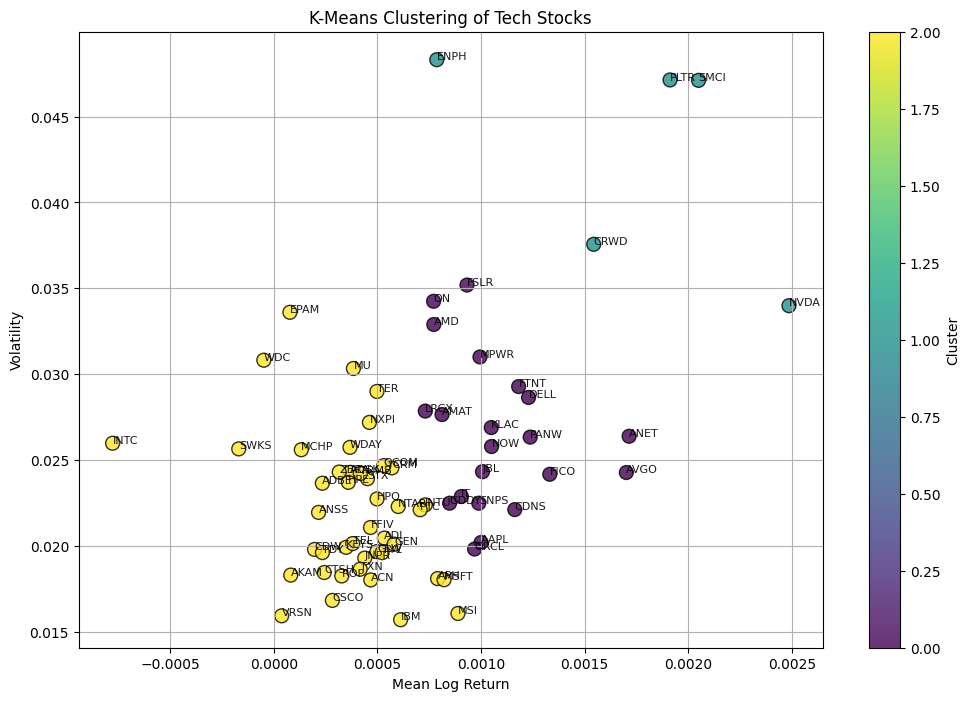

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# เตรียมข้อมูล X จาก features
X1 = features['MeanLogReturn'].values
X2 = features['Volatility'].values
X = np.array(list(zip(X1, X2)))

# สเกลข้อมูลก่อนทำ K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ทำ K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
features['Cluster'] = clusters

# พล็อตกราฟพร้อมสีตาม Cluster
plt.figure(figsize=(12,8))
scatter = plt.scatter(features['MeanLogReturn'], features['Volatility'],
                      c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)

# แสดงชื่อหุ้น (annotation)
for i, row in features.iterrows():
    plt.text(row['MeanLogReturn'], row['Volatility'], row['Ticker'], fontsize=8, alpha=0.9)

plt.xlabel('Mean Log Return')
plt.ylabel('Volatility')
plt.title('K-Means Clustering of Tech Stocks')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()


In [17]:
print(features)

   Ticker  MeanLogReturn  Volatility  Cluster
0    AAPL       0.001000    0.020212        0
1     ACN       0.000468    0.018032        2
2    ADBE       0.000234    0.023659        2
3     ADI       0.000534    0.020467        2
4    ADSK       0.000369    0.024292        2
..    ...            ...         ...      ...
64    TYL       0.000523    0.019618        2
65   VRSN       0.000038    0.015944        2
66   WDAY       0.000368    0.025748        2
67    WDC      -0.000048    0.030820        2
68   ZBRA       0.000316    0.024312        2

[69 rows x 4 columns]


In [18]:
# ส่งออกไฟล์ Excel พร้อมข้อมูล Cluster
features.to_excel("clustered_tech_stocks.xlsx", index=False)

print("ส่งออกไฟล์ clustered_tech_stocks.xlsx เรียบร้อยแล้ว")


ส่งออกไฟล์ clustered_tech_stocks.xlsx เรียบร้อยแล้ว


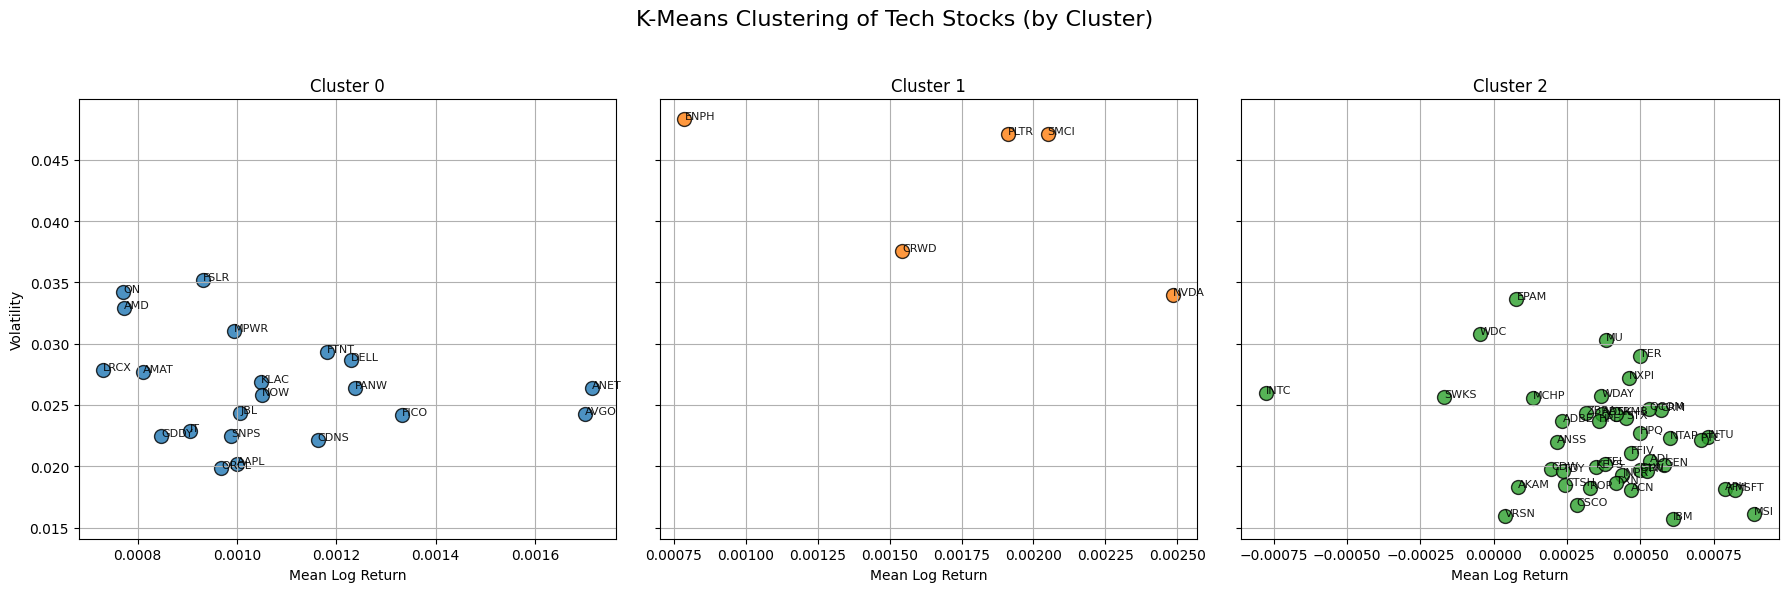

In [20]:
import matplotlib.pyplot as plt

# กำหนดสีแต่ละคลัสเตอร์ (สามารถปรับได้)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
cluster_labels = sorted(features['Cluster'].unique())
num_clusters = len(cluster_labels)

# สร้าง subplot
fig, axes = plt.subplots(1, num_clusters, figsize=(6 * num_clusters, 6), sharey=True)

if num_clusters == 1:
    axes = [axes]  # ถ้ามีคลัสเตอร์เดียว

for i, cluster in enumerate(cluster_labels):
    ax = axes[i]
    cluster_data = features[features['Cluster'] == cluster]

    ax.scatter(cluster_data['MeanLogReturn'], cluster_data['Volatility'],
               color=colors[i % len(colors)], s=100, edgecolors='k', alpha=0.8)

    for _, row in cluster_data.iterrows():
        ax.text(row['MeanLogReturn'], row['Volatility'], row['Ticker'], fontsize=8, alpha=0.9)

    ax.set_title(f"Cluster {cluster}")
    ax.set_xlabel("Mean Log Return")
    if i == 0:
        ax.set_ylabel("Volatility")
    ax.grid(True)

plt.suptitle("K-Means Clustering of Tech Stocks (by Cluster)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



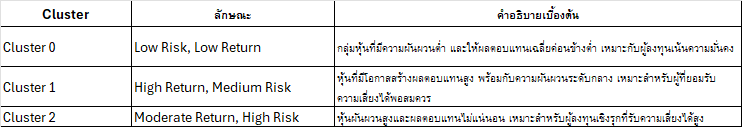

# ***  วิธีเลือก “หุ้นตัวแทน” จากแต่ละคลัสเตอร์  เลือกหุ้นที่ “ใกล้จุดศูนย์กลางคลัสเตอร์มากที่สุด  คำนวณระยะห่างจากแต่ละจุด (หุ้น) ไปยัง centroid ของคลัสเตอร์นั้น ๆ***

In [21]:
from sklearn.metrics import pairwise_distances_argmin_min

# หา centroid ของแต่ละคลัสเตอร์
centroids = kmeans.cluster_centers_

# หา index ของหุ้นที่ใกล้ centroid ที่สุดในแต่ละคลัสเตอร์
closest, _ = pairwise_distances_argmin_min(centroids, X_scaled)

# แสดงหุ้นตัวแทน
representatives = features.iloc[closest]
print(representatives[['Ticker', 'Cluster']])


   Ticker  Cluster
37   KLAC        0
51   PLTR        1
21   FFIV        2


 วิธีที่ 2: เลือกหุ้นที่มี “ขนาดกลาง” (ค่ากลาง)
ใช้ median หรือ average ของ MeanLogReturn และ Volatility ภายในกลุ่ม

เลือกหุ้นที่ค่าฟีเจอร์ใกล้ค่า median มากที่สุด

# ขั้นตอน: เลือกหุ้นที่ใกล้ค่ากลางของคลัสเตอร์ (Median-Based Representative) คำนวณ median ของ MeanLogReturn และ median ของ Volatility


# ***คำนวณ ระยะห่าง (Euclidean distance) ***

In [22]:
import numpy as np

representatives = []

# วนลูปในแต่ละคลัสเตอร์
for cluster in sorted(features['Cluster'].unique()):
    cluster_data = features[features['Cluster'] == cluster]

    # ค่ากลางของฟีเจอร์ในคลัสเตอร์
    median_log_ret = cluster_data['MeanLogReturn'].median()
    median_vol = cluster_data['Volatility'].median()

    # คำนวณระยะห่างจากค่ากลาง
    distances = np.sqrt(
        (cluster_data['MeanLogReturn'] - median_log_ret)**2 +
        (cluster_data['Volatility'] - median_vol)**2
    )

    # เลือกหุ้นที่ใกล้ค่ากลางที่สุด
    representative_idx = distances.idxmin()
    representatives.append(features.loc[representative_idx])

# แสดงหุ้นตัวแทนแต่ละกลุ่ม
representative_df = pd.DataFrame(representatives)
print(representative_df[['Ticker', 'Cluster', 'MeanLogReturn', 'Volatility']])


   Ticker  Cluster  MeanLogReturn  Volatility
50   PANW        0       0.001237    0.026344
51   PLTR        1       0.001912    0.047132
9    ANSS        2       0.000216    0.021962


# ***📌 วิธีเลือก “หุ้นตัวแทน” จากแต่ละคลัสเตอร์***
✅ วิธีที่ 1: เลือกหุ้นที่ใกล้ Centroid ของคลัสเตอร์มากที่สุด
ใช้ Euclidean Distance จากจุด (MeanLogReturn, Volatility) ไปยัง Centroid ของคลัสเตอร์

หุ้นที่มีระยะห่างน้อยที่สุด = ตัวแทนของกลุ่มนั้น

เหมาะสำหรับการจำลองลักษณะ "โดยรวม" ของกลุ่ม (เป็นค่าเฉลี่ยแบบรวมทุกมิติ)

📋 หุ้นตัวแทนที่ได้ (ใกล้ Centroid ที่สุด): Cluster	Ticker


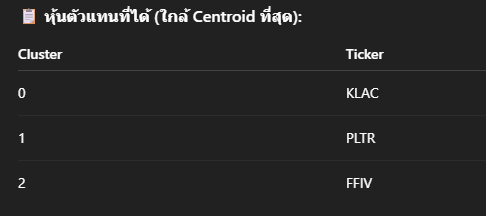



✅ วิธีที่ 2: เลือกหุ้นที่ใกล้ "ค่ากลาง (Median)" ของฟีเจอร์ในคลัสเตอร์
คำนวณ Median ของ MeanLogReturn และ Median ของ Volatility ภายในคลัสเตอร์

คำนวณ Euclidean Distance ระหว่างหุ้นแต่ละตัวกับตำแหน่ง (median, median)

เลือกตัวที่ใกล้ที่สุด = ตัวแทนของกลุ่มในเชิงค่ากลาง

เหมาะสำหรับการวิเคราะห์หุ้นที่เป็น "กลาง" ของกลุ่ม (ไม่สุดโต่ง)

📋 หุ้นตัวแทนที่ได้ (ใกล้ Median ที่สุด):


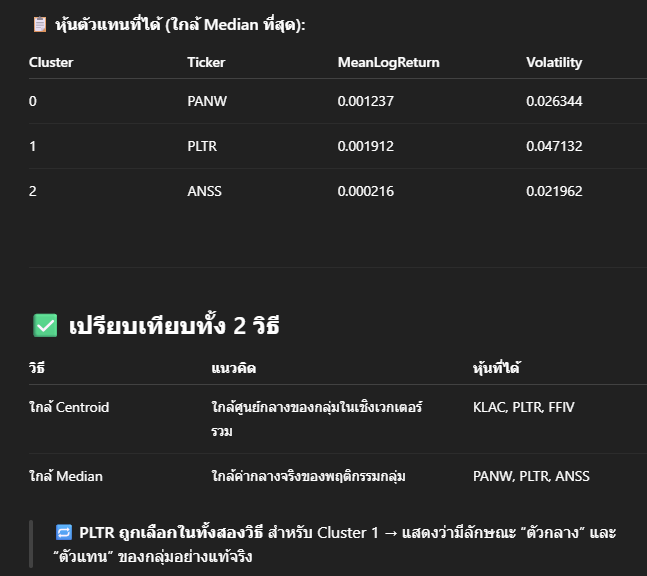


✅ เปรียบเทียบทั้ง 2 วิธี
วิธี	แนวคิด	หุ้นที่ได้
ใกล้ Centroid	ใกล้ศูนย์กลางของกลุ่มในเชิงเวกเตอร์รวม	KLAC, PLTR, FFIV
ใกล้ Median	ใกล้ค่ากลางจริงของพฤติกรรมกลุ่ม	PANW, PLTR, ANSS

🔁 PLTR ถูกเลือกในทั้งสองวิธี สำหรับ Cluster 1 → แสดงว่ามีลักษณะ “ตัวกลาง” และ “ตัวแทน” ของกลุ่มอย่างแท้จริง